# Mathematics lesson for Machine Learning
## Assignment 1 - Two-dimensional array and gradient problem

**[Problem 1] Linear function**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.arange(-50, 50 + 0.1, 0.1)
y = (1/2)*x + 1
print(x)
print(y)

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


**[Problem 2] Array combination**

In [3]:
# np.column_stack(): Stack 1-D arrays as columns into a 2-D array.
xy = np.column_stack((x, y))
print(xy.shape)

(1001, 2)


**[Problem 3] Find the gradient**

In [4]:
# Calcute the amount of change in X and Y
# We need to transpose before making calculation between diff X and diff Y (2 columns)
diff = (xy[1:] - xy[:-1]).T
gradient = diff[1] / diff[0]

#Print out the first 10 elements
print(gradient[:10])

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


**[Problem 4] Draw a graph**

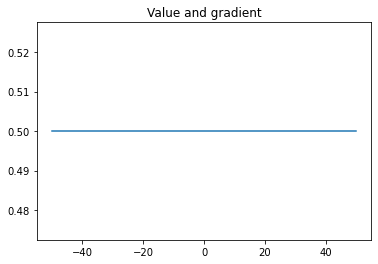

In [5]:
plt.title("Value and gradient")
plt.plot(xy.T[0][:-1], gradient)
plt.show()

**[Problem 5] Python functionalization**

In [6]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    Calculate the gradient using the amount of change.
    Parameters
    ----------------
    function : function
      The function you want to find, the one that returns the ndarray of y when you put the ndarray of x.
    x_range : tuple
      Specify the range in the same way as the argument of np.arange ().
    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      A combination of x and y. n depends on x_range.
    gradient : ndarray, shape(n-1,)
      Function gradient. One factor is reduced to make a difference
    """
    array_x = np.arange(*x_range)
    array_y = function(array_x)
    array_xy = np.column_stack((array_x, array_y))
    diff = (array_xy[1:] - array_xy[:-1]).T
    gradient = diff[1] / diff[0]
    return array_xy, gradient

def plot_gradient(array_xy, gradient, title=""):
    plt.title(title)
    plt.plot(array_xy.T[0][:-1], gradient)
    plt.show()

def function1(array_x):
    array_y = array_x ** 2
    return array_y

def function2(array_x):
    array_y = 2 * (array_x**2) + 2 ** array_x
    return array_y

def function3(array_x):
    array_y = np.sin(array_x**(1/2))
    return array_y

Gradient with $y=x^{2}$

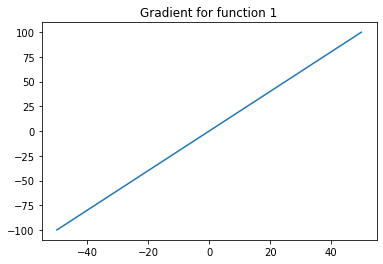

In [7]:
array_xy, gradient = compute_gradient(function1)
plot_gradient(array_xy, gradient, "Gradient for function 1")

Gradient with $y = 2x^{2} + 2^{x}$

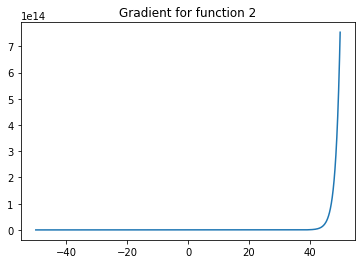

In [8]:
array_xy, gradient = compute_gradient(function2)
plot_gradient(array_xy, gradient, "Gradient for function 2")

Gradient with $y= sin\left( x^{\frac{1}{2}} \right)$

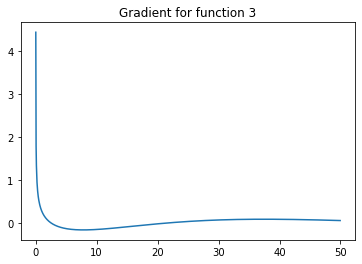

In [9]:
x_range = (0, 50.05, 0.05)
array_xy, gradient = compute_gradient(function3, x_range)
plot_gradient(array_xy, gradient, "Gradient for function 3")

**[Problem 6] Find the minimum value**

In [10]:
def min_in_func(function, x_range=(-50, 50.1, 0.1)):
    array_x = np.arange(*x_range)
    array_y = function(array_x)
    min_y_value = array_y.min()
    min_y_idx = array_y.argmin()
    _, gradient = compute_gradient(function, x_range)
    print('Minimum of the function is {}'.format(min_y_value))
    print('Before taking min y, gradient = {}'.format(gradient[min_y_idx - 1]))
    print('After taking min y, gradient = {}'.format(gradient[min_y_idx]))

In [11]:
min_in_func(function1)

Minimum of the function is 5.048709793414476e-25
Before taking min y, gradient = -0.09999999999858034
After taking min y, gradient = 0.1000000000014225


In [12]:
min_in_func(function2)

Minimum of the function is 0.9505505632959851
Before taking min y, gradient = -0.4170183305979998
After taking min y, gradient = 0.024824282409972788


In [13]:
min_in_func(function3, x_range=(0, 50.05, 0.05))

Minimum of the function is -0.9999997540298113
Before taking min y, gradient = -0.0003563201860368131
After taking min y, gradient = 0.00020682612694501512


As can be seen in the result, before taking $y_{min}$, the gradient value is negative while after taking $y_{min}$ the value becomes positive.